Generating region chart..
           time  Latin America & Caribbean total  \
0    2001-01-01                                0   
1    2001-02-01                                0   
2    2001-03-01                                0   
3    2001-04-01                                0   
4    2001-05-01                                0   
..          ...                              ...   
267  2023-04-01                            58862   
268  2023-05-01                            59063   
269  2023-06-01                            59231   
270  2023-07-01                            59538   
271  2023-08-01                            59840   

     Central & Eastern Europe & Central Asia total  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   
..                       

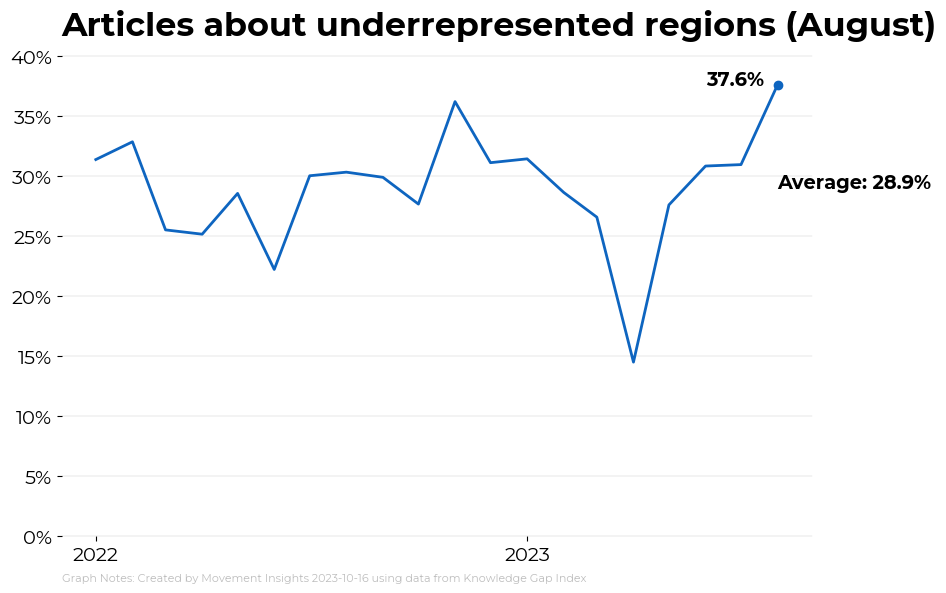

In [37]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import date, datetime
import calendar
import warnings
%run wikicharts1.ipynb


def main():
    
    print("Generating region chart..")
    df = pd.read_csv("data/updated_geo_data.csv")
    #---PARAMETERS---
    save_file_name = "Underrepresented Region Growth.png"
    display_flag = True
    print(df)

    #note start and end dates may be different depending on chart_type
    start_date = "2022-01-01"
    end_date = "2023-08-31"

    #convert string to datetime
    df['time'] = pd.to_datetime(df['time'])

    #truncate data to period of interest
    df = df[df["time"].isin(pd.date_range(start_date, end_date))]
    
    df['metric_underrepresented'] =  df['metric_underrepresented'] /100

    #---MAKE CHART---
     
    
    chart = Wikichart(start_date, end_date, df, time_col='time') # Initialization
    chart.init_plot()

    
    chart.plot_line('time', 'metric_underrepresented', wmf_colors['blue'])
    #chart.plot_monthlyscatter('time', 'metric_underrepresented', wmf_colors['blue'])
    
    #chart.plot_yoy_highlight('time', 'metric_underrepresented')

  
    chart.format(title='Articles about underrepresented regions', data_source="Knowledge Gap Index", titlepad=15) 
    
    # Annotations 
    
     # Set the y-axis limit from 0 to the maximum value in the 'underrepresented' column
    plt.gca().set_ylim(0.00, df['metric_underrepresented'].max()) 

    # Define ticks based on the new y-axis
    ticks = np.arange(0.00, df['metric_underrepresented'].max() + 0.05, 0.05)
    plt.yticks(ticks, [f"{int(tick*100)}%" for tick in ticks])
    
    chart.annotate_last_point(x='time', y='metric_underrepresented', xytext=(-20, 0), ha='right')
    
    #chart.annotate(x='time',
            #   y='metric_underrepresented',
           #    num_annotation=chart.calc_mean(y='metric_underrepresented', mean_note=""))
    
    mean_y = df['metric_underrepresented'].mean()
    plt.annotate(f"Average: {mean_y:.1%}",
            xy=(df['time'].iat[-1], mean_y),
            xytext=(0, 0),  
            xycoords='data',
            textcoords='offset points',
            color='black',
            fontsize=style_parameters['text_font_size'],
            weight='bold',
            family=style_parameters['font'])
    

    # show plot
    chart.finalize_plot(save_file_name, display=display_flag)

if __name__ == "__main__":
    main()
